In [78]:
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

**7.1 Effect of interpolation techniques in image resizing**

<Figure size 1440x720 with 0 Axes>

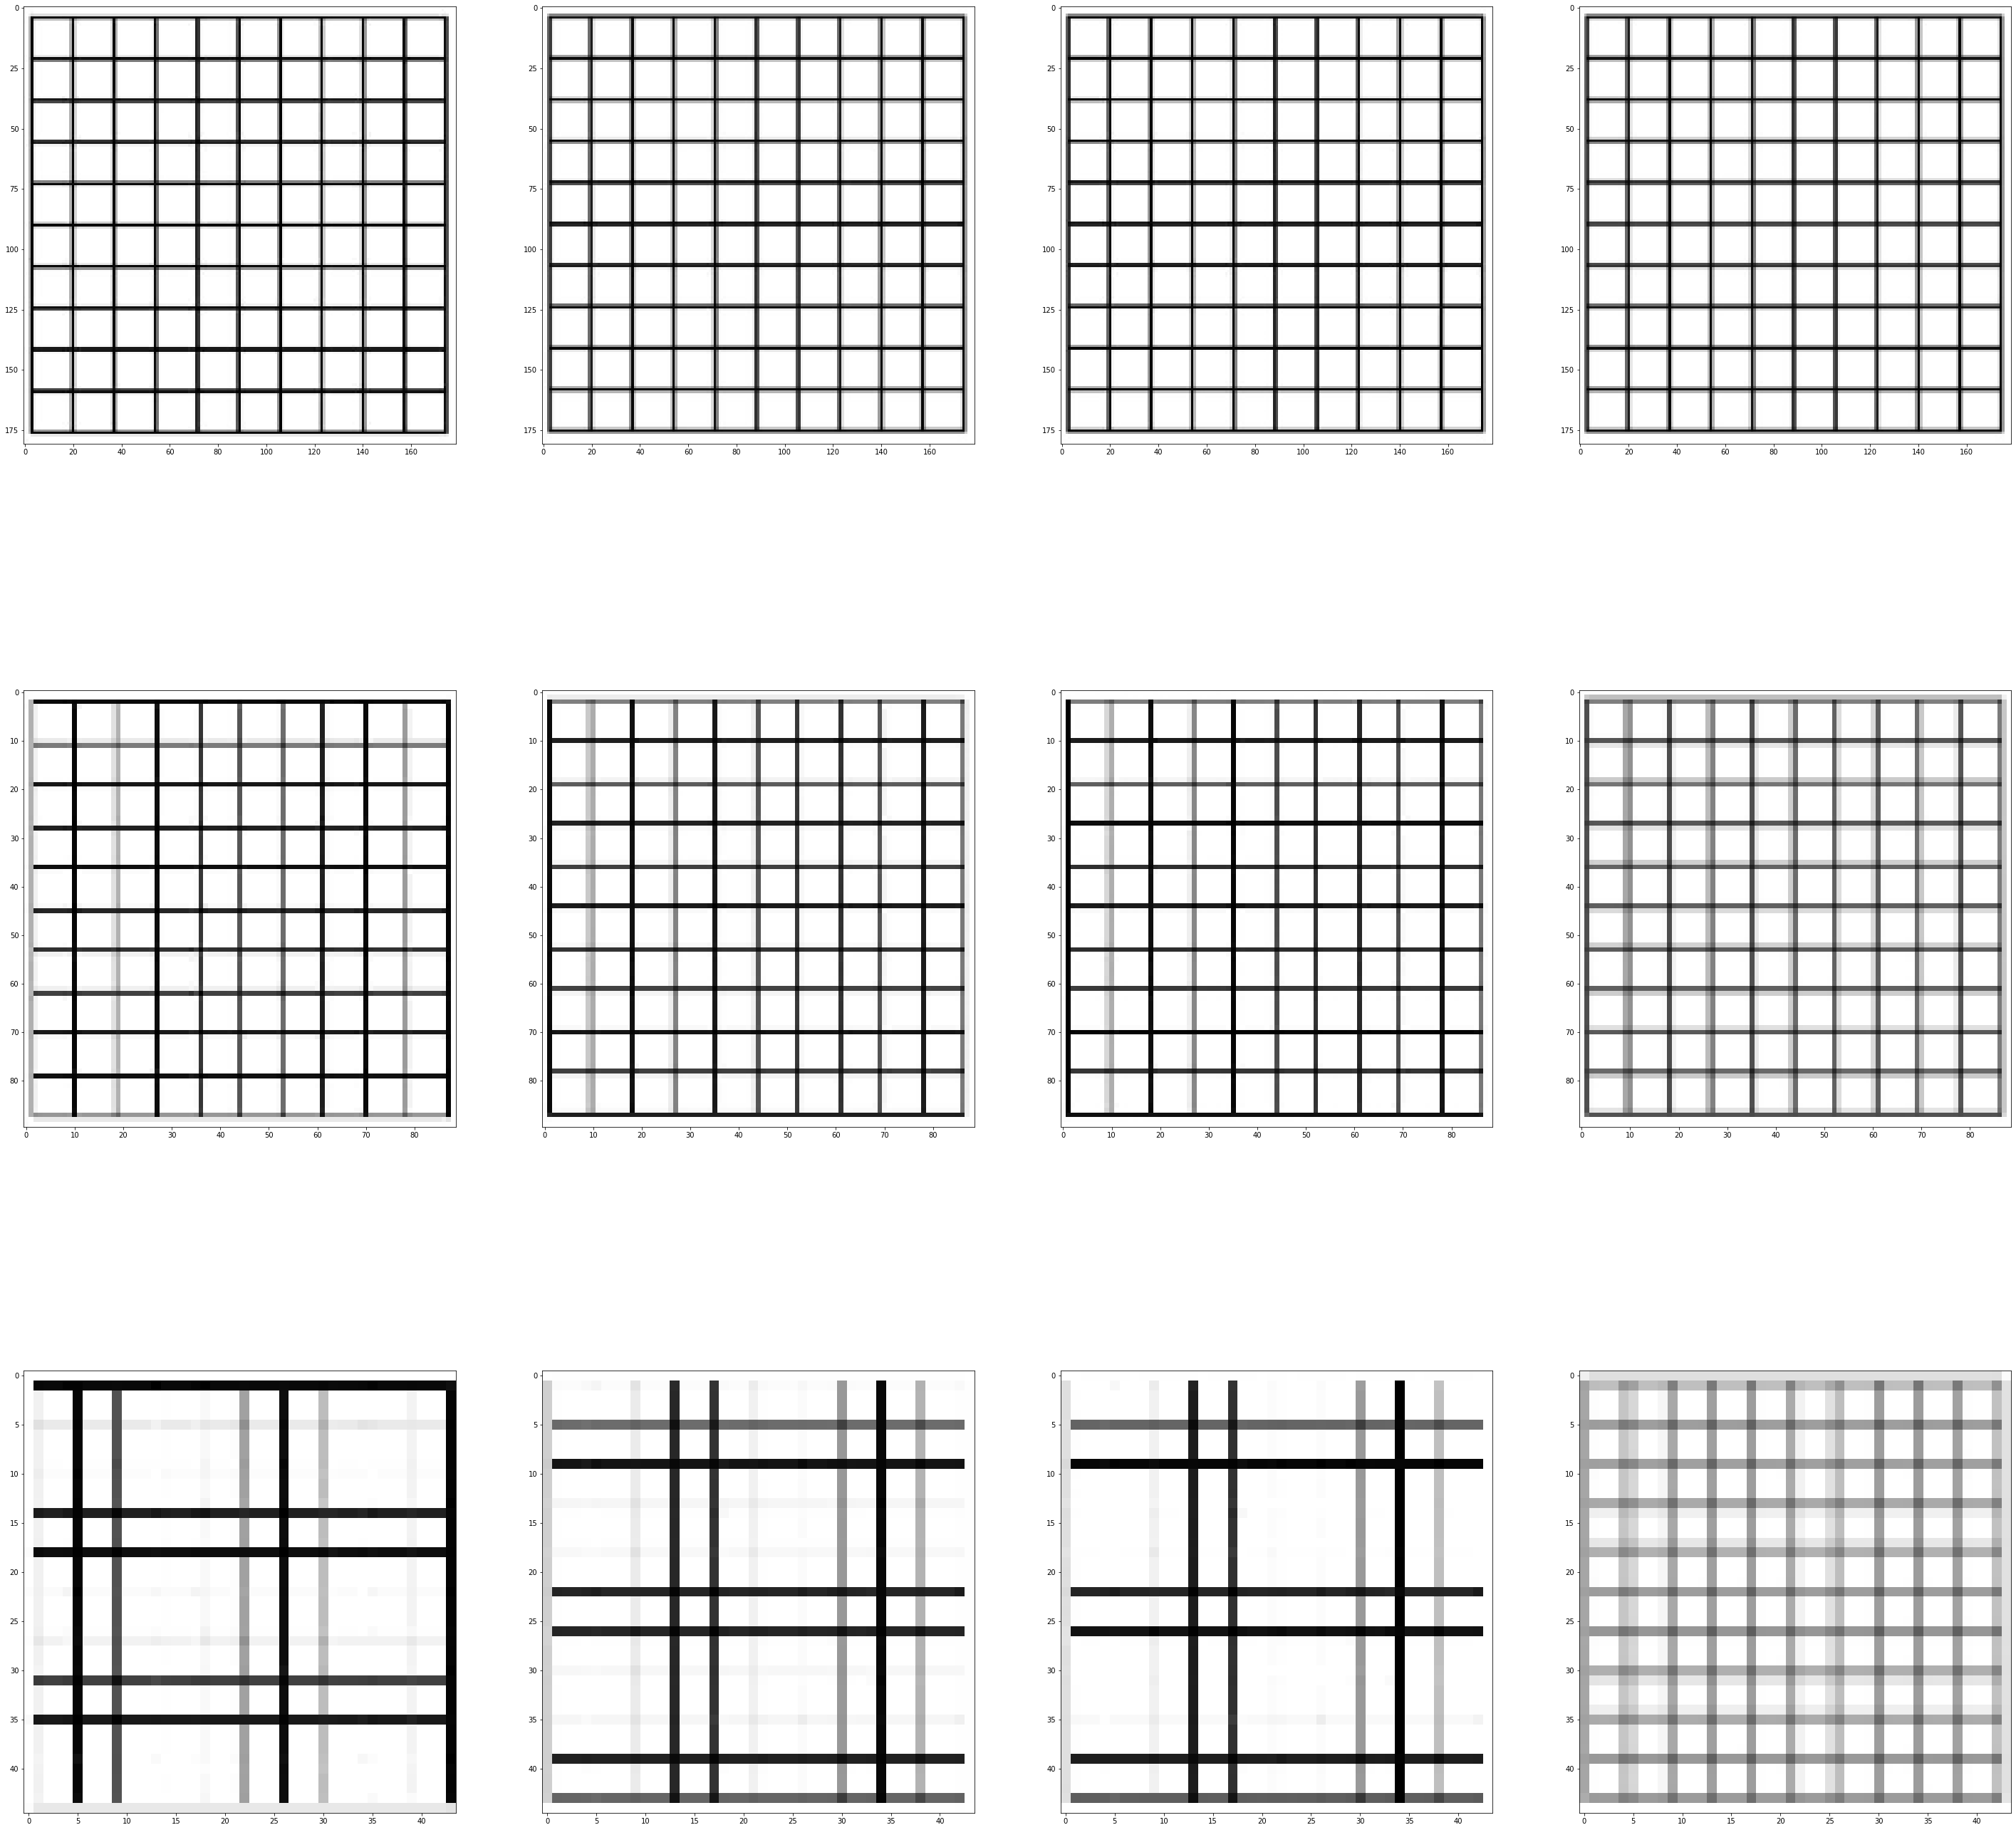

In [79]:
# Read image file
img = plt.imread("Grid_Image.JPG")
h, w, c = img.shape

# Define resize factor
Reduce_factors = [2,4,8]
# scale_factors = 1/Reduce_factors

# Define interpolation method
inter_methods = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA]

list_img = []

plt.figure(figsize= (20,10))
# Display result using each scale_factors & interpolation methods
for i, val_rf in enumerate(Reduce_factors):
    for j, val_im in enumerate(inter_methods):
        img_n = cv2.resize(img, (w//val_rf,h//val_rf), interpolation = val_im)
        list_img.append(img_n)

f,ax = plt.subplots(nrows=3,ncols=4,figsize=(50,50))
f.set_facecolor("white")
ix = 1
for ax in ax.flat:
	ax.imshow(list_img[ix-1])
	ix += 1
plt.savefig('act7_1_template.png', facecolor=f.get_facecolor(), transparent=True)
plt.show()

<Figure size 1440x720 with 0 Axes>

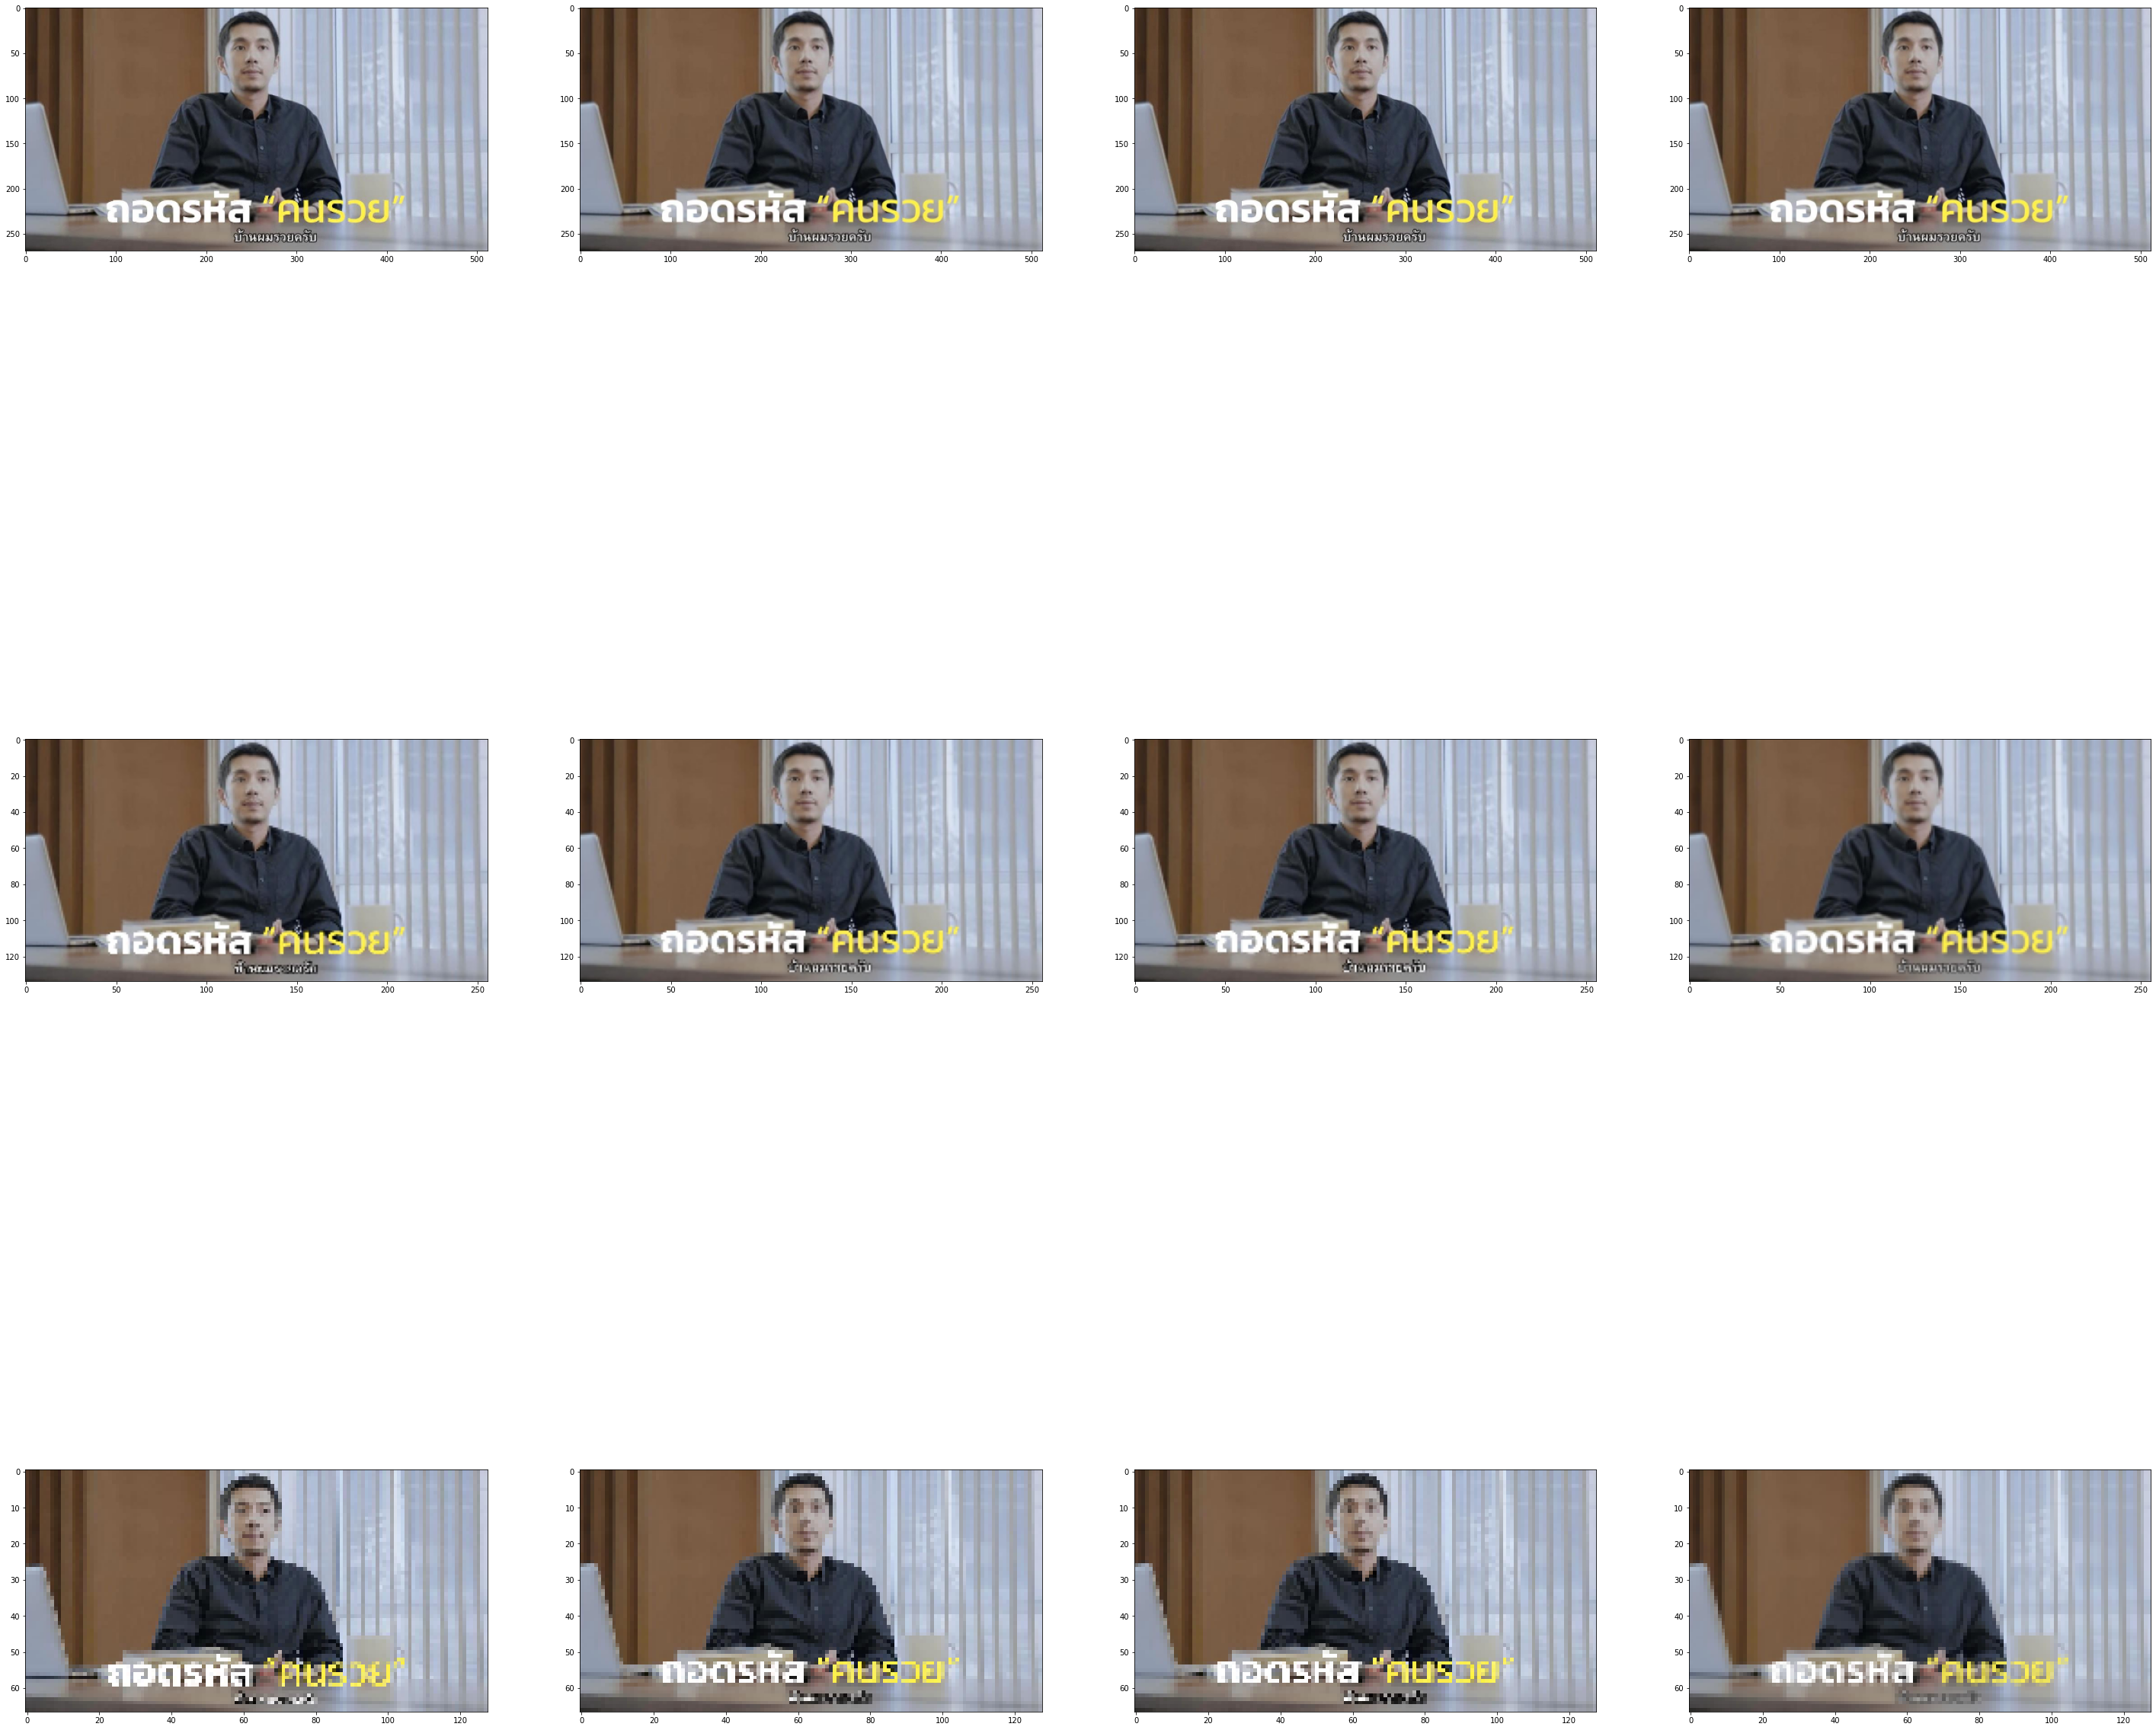

In [80]:
# Read image file
img = plt.imread("pic.jpg")
h, w, c = img.shape

# Define resize factor
Reduce_factors = [2,4,8]
# scale_factors = 1/Reduce_factors

# Define interpolation method
inter_methods = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA]

list_img = []

plt.figure(figsize= (20,10))
# Display result using each scale_factors & interpolation methods
for i, val_rf in enumerate(Reduce_factors):
    for j, val_im in enumerate(inter_methods):
        img_n = cv2.resize(img, (w//val_rf,h//val_rf), interpolation = val_im)
        list_img.append(img_n)

f,ax = plt.subplots(nrows=3,ncols=4,figsize=(50,50))
f.set_facecolor("white")
ix = 1
for ax in ax.flat:
	ax.imshow(list_img[ix-1])
	ix += 1
plt.savefig('act7_1.png', facecolor=f.get_facecolor(), transparent=True)
plt.show()

**7.2 Image Augmentation Using Keras Imagedatagenerator**


In [81]:
# Read image file
img2 = cv2.imread("pic.jpg")
# img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

img_reshape = np.array([img2])
print(img_reshape.shape)

(1, 538, 1024, 3)


In [82]:
# Define fill method
fill_method = ['constant', 'nearest', 'reflect', 'wrap']

frames = []

# Define parameters
Npic = 10
rotation_range = 45
width_shift_range = 20.0
height_shift_range = 20.0
shear_range = 0.5
zoom_range = 1.5
horizontal_flip = False
vertical_Flip = False

# Define ImageDataGenerator with parameters
for m in fill_method:
    datagen = ImageDataGenerator(
        rotation_range=rotation_range,
        width_shift_range=width_shift_range,
        height_shift_range=height_shift_range,
        shear_range=shear_range,
        zoom_range=zoom_range,
        horizontal_flip=horizontal_flip,
        fill_mode = m,
    )

    # Creates our batch of one image
    pic = datagen.flow(img_reshape, batch_size=1)

    # Random generate transformed images and write to a video file
    for i in range(1, Npic):
        batch = pic.next()
        im_result = batch[0].astype('uint8')
        frames.append(im_result)
        

In [83]:
file_path = 'act7_2.mp4'
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
writer = cv2.VideoWriter(file_path, fourcc, 3, (w, h))

for frame in frames:
    writer.write(frame)

writer.release()
print("Finished")

Finished
